In [33]:
CR=0.8 #Cross-over rate
MR=0.01 #Mutation rate

In [34]:
import pandas as pd
import numpy as np

In [35]:
data=pd.read_csv('ionosphere.csv') #Load the dataset
data.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [36]:
data.shape

(350, 35)

In [37]:
rows, columns= data.shape[0], data.shape[1]

NP=10 #Number of population
D=columns-1 #Size of the problem

In [38]:
#Separate the features and output column

y=data.iloc[:,-1]
tdata=data.iloc[:,0:-1]
tdata.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011


In [39]:
from sklearn.model_selection import train_test_split

training_data,testing_data,training_classlebel,testing_classlebel=train_test_split(tdata,y,test_size=0.2,random_state=42)
training_data.shape,testing_data.shape,training_classlebel.shape,testing_classlebel.shape

((280, 34), (70, 34), (280,), (70,))

In [40]:
import random

#Naive Bayes Classifier is used in this problem

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [41]:
from numpy.core.fromnumeric import cumsum

X=np.zeros((NP,D),dtype=int)
fit=np.zeros((NP))

for i in range(NP):
  for d in range(D):
    if random.random()>0.5:
      X[i,d]=1

In [42]:
X

array([[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1

In [43]:
#Calculating fitness for each individual

for i in range(NP):
  if((training_data.iloc[:,X[i,:]==1]).shape[1]==0):
    fit[i]=0.5
  else:
    o1=nb.fit(training_data.iloc[:,X[i,:]==1],training_classlebel)
    Ac1=o1.predict(testing_data.iloc[:,X[i,:]==1])
    fit[i]=sum(Ac1!=testing_classlebel)/testing_data.shape[0]

In [44]:
t=1
curve=[] #List to store fitness
while t<=200:
  #convert error to accuracy (inverse of fitness)
  Ifit=1-fit
  Prob=Ifit/sum(Ifit) #Fitness Probability is calculated

  #Crossover
  X1=[]
  X2=[]

  for i in range(NP):
    if random.random()<CR:
      #Cumulative Summation
      C=cumsum(Prob)
      #Random one value, most probability value [0-1]
      P=random.random()
      #Route wheel
      for j in range(len(C)):
        if C[j]>P:
          Route=j
          break
      k1=Route
      k2=Route

      #Store parents
      P1=X[k1,:]
      P2=X[k2,:]

      #Random select one crossover point
      ind=random.randint(0,D-1)

      #Single point crossover between two parents
      X1.append((np.append(P1[0:ind],P2[ind:D])).tolist()) #Each newly generated offspring is getting added to X1 and X2
      X2.append((np.append(P2[0:ind],P1[ind:D])).tolist())

  #Union
  Xnew=X1+X2
  Nc=len(Xnew)
  Fnew=np.zeros(Nc) #Generate a fitness array for the new generation individuals
  Xnew=np.array(Xnew) #Convert the list Xnew to 2-D array

  #Mutation
  for i in range(Nc):
    for d in range(D):
      if random.random()<=MR:
        #Mutate from 0 to 1 or from 1 to 0
        Xnew[i,d]=1-Xnew[i,d]

    #Fitness
    if((training_data.iloc[:,Xnew[i,:]==1]).shape[1]==0):
      Fnew[i]=0.5
    else:
      o1=nb.fit(training_data.iloc[:,Xnew[i,:]==1],training_classlebel)
      Ac1=nb.predict(testing_data.iloc[:,Xnew[i,:]==1])
      Fnew[i]=sum(Ac1!=testing_classlebel)/testing_data.shape[0]

  #Merge Population
  XX=np.concatenate((X,Xnew),axis=0) #We merge the population of the previous generation and the new generation
  FF=np.append(fit,Fnew) #We merge the fitness of the previous generation and the new generation
  # print(FF)

  #Select N best solution
  idx=np.argsort(FF) #Returns an array of indices that would sort the array
  FF=np.sort(FF)
  X=XX[idx[0:NP],:] #Select 10 best rows according to the sorted indices
  fit=FF[0:NP]

  #Best Chromosomes
  Xgb=X[0,:]
  fitG=fit[0]
  curve.append(fitG)
  #print(XX)

  t=t+1

In [45]:
#Select features based on selected index

Sf=[] #Position of the columns that are going to be passed

for k in range(D):
  if Xgb[k]==1:
    Sf.append(k)

Nf=len(Sf)

print("Selected feature indices are: ",Sf)
print("Number of selected features are: ",Nf)

Selected feature indices are:  [0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 16, 18, 19, 21, 22, 24, 28, 30]
Number of selected features are:  20


In [46]:
#Accuracy without FS

o1=nb.fit(training_data,training_classlebel)
Ac1=nb.predict(testing_data)
Fnew1=sum(Ac1==testing_classlebel)/testing_data.shape[0]*100
print("Accuracy without FS: ", Fnew1)

Accuracy without FS:  84.28571428571429


In [47]:
#Accuracy with FS

o1=nb.fit(training_data.iloc[:,Sf],training_classlebel)
Ac1=nb.predict(testing_data.iloc[:,Sf])
Fnew2=sum(Ac1==testing_classlebel)/testing_data.shape[0]*100
print("Accuracy with FS: ",Fnew2)

Accuracy with FS:  90.0


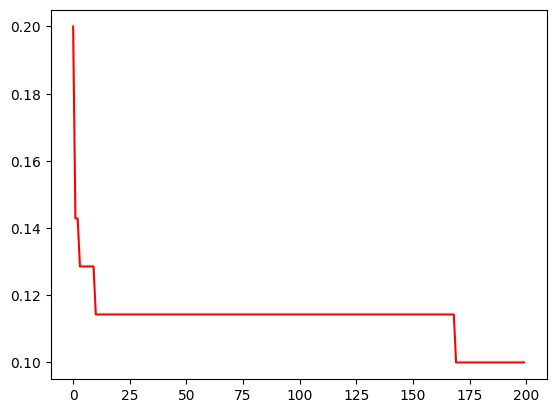

In [48]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot()
fig.show()

ax.plot(curve, color='r')
fig.canvas.draw()